In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission.head()

,id,target
0,250,0
1,251,0
2,252,0
3,253,0
4,254,0


In [3]:
%%time
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print(train.shape, test.shape)

(250, 302) (19750, 301)
CPU times: user 1.64 s, sys: 110 ms, total: 1.75 s
Wall time: 1.76 s


In [4]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [5]:
test.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


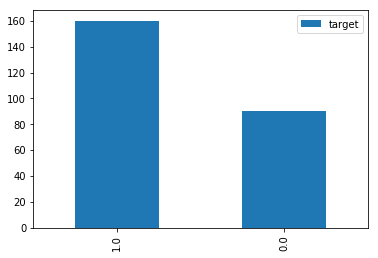

In [9]:
train['target'].value_counts().to_frame().plot.bar()

In [10]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [11]:
test.describe()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,...,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000
mean,10124.500000,-0.014043,0.000972,0.005145,-0.003525,0.003394,0.002738,0.004213,-0.010618,-0.003211,...,0.002577,-0.010130,-0.003961,0.012793,0.009063,0.007512,-0.004283,-0.001203,0.013076,0.000070
std,5701.478244,1.003779,0.993955,1.000809,1.008545,1.002826,1.002917,0.994315,0.997972,0.996938,...,0.996314,0.996511,0.999788,1.014520,0.994000,0.999559,0.996270,1.003705,0.996285,1.000596
min,250.000000,-4.070000,-3.664000,-4.258000,-4.140000,-4.411000,-3.586000,-3.953000,-3.906000,-4.203000,...,-3.688000,-3.877000,-3.599000,-3.650000,-3.865000,-3.814000,-3.835000,-3.908000,-3.581000,-4.135000
25%,5187.250000,-0.688750,-0.667000,-0.668000,-0.686000,-0.671000,-0.679000,-0.673000,-0.680000,-0.667000,...,-0.660000,-0.675000,-0.684750,-0.672000,-0.656750,-0.664000,-0.665000,-0.680000,-0.663000,-0.675000
50%,10124.500000,-0.006000,0.001000,0.017000,-0.006000,0.007000,0.005000,0.014000,-0.014000,-0.003000,...,-0.006000,-0.015000,-0.004000,0.007000,0.001000,0.001000,-0.001000,-0.010000,0.016000,0.007000
75%,15061.750000,0.664000,0.676000,0.681000,0.682000,0.676000,0.684750,0.670000,0.660750,0.671000,...,0.667000,0.654000,0.680000,0.694000,0.682000,0.685000,0.669000,0.673000,0.686000,0.676000
max,19999.000000,3.767000,3.864000,3.866000,3.871000,3.955000,3.819000,3.954000,3.669000,3.948000,...,3.619000,3.829000,3.717000,5.092000,5.125000,3.681000,3.716000,3.932000,3.764000,4.070000


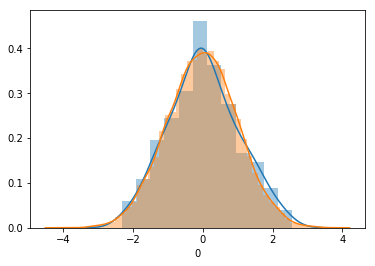

In [27]:
def dist_diff(train, test):
    sns.distplot(train['0'])
    sns.distplot(test['0'])
    
dist_diff(train, test)

# Test

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
splits = 10
folds = RepeatedStratifiedKFold(n_splits=splits, n_repeats=20, random_state=42)
oof_preds = np.zeros(X_train.shape[0])
sub_preds = np.zeros(X_test.shape[0])

for fold_, (trn_, val_) in enumerate(folds.split(X_train, Y_train)):
    trn_x, trn_y = X_train.iloc[trn_], Y_train[trn_]
    val_x, val_y = X_train.iloc[val_], Y_train[val_]

    '''
    clf = LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced', 
            penalty='l1', solver='liblinear', random_state=42)
    model = RFE(clf, 25, step=1)
    #model = RFECV(clf, step=1, cv=(splits - 1))
    model.fit(trn_x, trn_y)
    oof_preds[val_] = model.predict_proba(val_x)[:,1]
    sub_preds += model.predict_proba(X_test)[:,1] / splits / 20 #folds.n_splits
    '''
    clf = Lasso(alpha=0.03, tol=0.01, selection='random', random_state=42)
    #model = RFE(clf, 20, step=1)
    model = RFECV(clf, step=1, cv=(splits - 1))
    model.fit(trn_x, trn_y)
    oof_preds[val_] = model.predict(val_x).clip(0, 1)
    sub_preds += model.predict(X_test).clip(0, 1) / splits / 20 #folds.n_splits

In [13]:
X_train = train.drop(['target', 'id'], axis=1)
Y_train = train['target']
X_test = test.drop(['id'], axis=1)


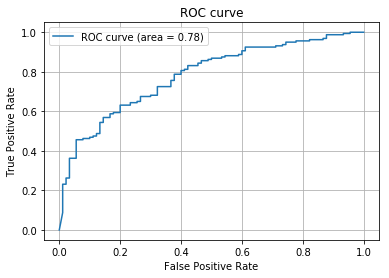

In [14]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [16]:
submission = pd.DataFrame({
    'id': test['id'],
    'target': sub_preds
})
submission.to_csv("./data/submission_test1.csv", index=False)

0.652998154426458


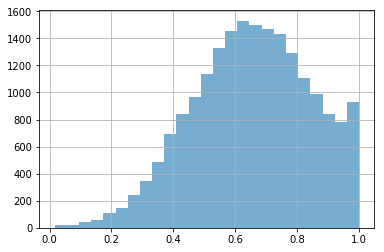

In [17]:

submission['target'].hist(bins=25, alpha=0.6)

In [3]:
_='''
from imblearn.over_sampling import SMOTE,ADASYN

#sm = SMOTE(random_state=42)
#sm = SMOTE(kind='svm',random_state=42)
#sm = SMOTE(kind='borderline1',random_state=42)
sm = ADASYN(random_state=42)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)
print(X_train.shape)
'''